
# Project:Twitter Data Wrangling

 Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Gather">Data Gathering</a></li>
<li><a href="#Access">Assessing Data</a></li>
<li><a href="#Clean">Cleaning Data</a></li>
<li><a href="#Analysis">Analyzing, and Visualizing data</a></li>    
<li><a href="#Conclusion">Conclusions</a></li>
</ul>

<a id='Intro'></a>

 Introduction
The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog

# The Data
* **Enhanced Twitter Archive:** The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo).


* **Additional Data via the Twitter API:** Twitter's API was queried to gather this data, retweet count and favorite count are two of the notable column omissions.


* **Image Predictions File:** The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library using this.

<a id='Gather'></a>

## Data Gathering

In [1]:
#Importing needed libraries
import pandas as pd 
import numpy as np 
import requests 
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#Reading the twitter archive csv file of tweets
df = pd.read_csv('../Downloads/twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Downloading image prediction file from the udacity url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
#Reading the image prediction csv file
img_df = pd.read_csv('image-predictions.tsv',sep='\t')
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Creating API object to gather Twitter data, ids removed for privacy reasons.
consumer_key = 'EekW5xrgsaBAXuVDY2bo2eqt9'
consumer_secret = 'xORfn7PzWY49nhoGPcArwvB60BFPx620AfR9neOxlrJIqW59Bc'
access_token = '1023957794989502464-9BcupuajqJM3mRP8FaSTPFloJiu9xX'
access_secret = 'kot1lympfV1vBz6ca1va3B7XeZzvpyXDTMJdDMz9628v6'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(),wait_on_rate_limit=True)

In [6]:
tweet_ids = df['tweet_id']

In [7]:
#Download Tweepy status object based on Tweet ID and store in list
success = []
# Tweets that can't be found would be saved in the list below:
failures = []
for tweet_id in tweet_ids:
    try:
        success.append(api.get_status(tweet_id, tweet_mode='extended'))
    except Exception as e:
            failures.append(tweet_id)

Rate limit reached. Sleeping for: 315
Rate limit reached. Sleeping for: 309


In [8]:
print("success" ,len(success))
print("failures" , len(failures))

success 2326
failures 30


In [9]:
#Storing the json data in txt file
with open('tweet_json.txt', 'w') as file:
    json.dump(success, file, indent=4)

In [10]:
#opening json file 
df_list = []

with open('tweet_json.txt') as file:
        df_list.append(json.loads(line)for line in file)

In [13]:
pd.DataFrame(success).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2326 non-null   object 
 1   id                             2326 non-null   int64  
 2   id_str                         2326 non-null   object 
 3   full_text                      2326 non-null   object 
 4   truncated                      2326 non-null   bool   
 5   display_text_range             2326 non-null   object 
 6   entities                       2326 non-null   object 
 7   extended_entities              2056 non-null   object 
 8   source                         2326 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [11]:
#reading json file data
tweet_df = pd.DataFrame(success, columns = ['id' , 'retweet_count' , 'favorite_count'])
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,6824,32714
1,892177421306343426,5140,28292
2,891815181378084864,3394,21247
3,891689557279858688,7042,35681
4,891327558926688256,7555,34083
...,...,...,...
2321,666049248165822465,36,85
2322,666044226329800704,111,241
2323,666033412701032449,35,97
2324,666029285002620928,39,110


In [14]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


<a id='Access'></a>
 ## Assessing Data 

### *Enhanced Twitter Archive(df)*

In [16]:
df.head(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
df.sample(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,None,None,None
1668,682638830361513985,NaN,NaN,2015-12-31 19:05:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have no words. Just a magnificent pup. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682638830...,12,10,None,None,None,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,10,10,None,None,None,None,None
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947...,11,10,a,None,None,None,None
1011,747439450712596480,NaN,NaN,2016-06-27 14:40:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Linus. He just wanted to say hello but...,NaN,NaN,NaN,https://vine.co/v/5uTVXWvn3Ip,12,10,Linus,None,None,None,None
1074,739844404073074688,NaN,NaN,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,None,None,None,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None
1568,687818504314159109,NaN,NaN,2016-01-15 02:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",With great pupper comes great responsibility. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687818504...,12,10,None,None,None,pupper,None


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
df.tweet_id.duplicated().sum()

0

In [21]:
df.name.duplicated().sum()

1399

In [22]:
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Blue         1
Mosby        1
Cupid        1
Horace       1
Tonks        1
Name: name, Length: 957, dtype: int64

In [23]:
df[df['name'] != 'None'].name.count()

1611

In [24]:
df[df['name'] == 'None'].name.count()

745

In [25]:
df[df['name'] == 'a'].name.count()

55

In [26]:
df[df['name'] == 'an'].name.count()

7

In [27]:
df[df['name'] == 'such'].name.count()

1

In [29]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [83]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [140]:
df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


### *Image Predictions File(img_df)*

In [30]:
img_df.head(40)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
img_df.sample(40)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,1,panpipe,0.962572,False,bannister,0.025248,False,golden_retriever,0.002930,True
1198,740699697422163968,https://pbs.twimg.com/media/Ckd-bqVUkAIiyM7.jpg,1,lawn_mower,0.878863,False,swing,0.024535,False,barrow,0.019577,False
872,697990423684476929,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2,Pembroke,0.984783,True,Cardigan,0.015018,True,Shetland_sheepdog,0.000074,True
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True


In [32]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
img_df.tweet_id.duplicated().sum()

0

### *Additional Data via the Twitter API (tweet_df)*

In [36]:
tweet_df.head(40)

,id,retweet_count,favorite_count
0,892420643555336193,6824,32714
1,892177421306343426,5140,28292
2,891815181378084864,3394,21247
3,891689557279858688,7042,35681
4,891327558926688256,7555,34083
5,891087950875897856,2537,17170
6,890971913173991426,1610,10006
7,890729181411237888,15338,55013
8,890609185150312448,3534,23681
9,890240255349198849,5937,27004


In [37]:
tweet_df.sample(40)

,id,retweet_count,favorite_count
348,828801551087042563,3078,0
132,865359393868664832,4180,22813
2161,668955713004314625,61,233
166,858107933456039936,2474,13779
31,886054160059072513,90,0
793,770772759874076672,1295,4730
366,826848821049180160,9122,32906
1770,676975532580409345,925,2452
851,760893934457552897,866,3456
11,889880896479866881,4040,23702


In [38]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [194]:
tweet_df.id.duplicated().sum()

0

## Assessing Observations


### Quality 


#### General
- Also, `tweet_id` and `id` column is an int dtype instead of object or string accross dataset

#### *Enhanced Twitter Archive(`df`)*
- Some columns are mostly empty and not needed for the assessing data objectives. This include; `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`,`in_reply_to_status_id`, and `in_reply_to_user_id`.
- `timestamp` is an object dtype instead of datetime.
- Nulls represented as 'None' in the `name` column.
- Duplicated and unusual dog names in the `name` coloumn like 'a' and 'an'.
- Unnecessary HTML tags in the `source` column instead of utility name.
- Some rows in `rating_numerator` were not correctly extracted
- `rating_numerator` and `rating_denominator` is int dtype instead of float

#### *Image Predictions File(`img_df`)*
- Refining p1, p2 and p3 columns and confidence associated with them by combining.
- Inconsistent capitalization in the prediction column.

#### *Additional Data via the Twitter API(`tweet_df`)*
- Column named `id` instead of `tweet_id`. For easier merging



### Tidiness  
- All tables should be merged into a single dataset.
- The `doggo`, `floofer`, `pupper`, and `puppo` columns in `df` could be combined into a single column.

<a id='Clean'></a>
## Cleaning

In [195]:
# Making copies of original pieces of data
df_clean = df.copy()
img_df_clean = img_df.copy()
tweet_df_clean = tweet_df.copy()

## Quality

### Define

### *Enhanced Twitter Archive(`df`)*
1. Remove rows in `rating_numerator` that were not correctly extracted
2. Change `rating_numerator` and `rating_denominator` from int dtype to object or float dtype
3. Remove the columns `retweeted_status_id`, `retweeted_status_user_id`,`retweeted_status_timestamp`,`in_reply_to_status_id`, and `in_reply_to_user_id`.
4. Change the `timestamp` column from object dtype to datetime dtype.
5. Change the `tweet_id` column from int dtype to object or string dtype.
6. Change the 'None' values in the `name` column to NaN.
7. Change the rows with very unusual dog names in the `name` column like 'a' and 'an' to NaN.
8. Remove the anchor link and retain only the text for the `source` column.

In [196]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


###### Define
1. Remove rows in `rating_numerator` were not correctly extracted
2. Change `rating_numerator` and `rating_denominator` from int dtype to object or float dtype

#### Code

In [197]:
df_clean['rating_numerator'] =  df_clean['rating_numerator'].astype(str)

In [198]:
dt1 = df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
dt1

C:\Users\maxim\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [199]:
dt1.rating_numerator = df_clean['text'].str.extract(r"(\d+\.\d*\/\d+)")

In [200]:
dt2 = dt1.rating_numerator.str[:-3]
dt2

45       13.5
340      9.75
695      9.75
763     11.27
1689      9.5
1712    11.26
Name: rating_numerator, dtype: object

In [201]:
df_clean.loc[[45, 340, 695, 763, 1689, 1712],['rating_numerator']]  = dt2

In [202]:
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)

##### Test

In [203]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\maxim\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


In [204]:
df_clean.loc[[ 45, 340, 695, 763, 1689, 1712]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10.0,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,None,None,None,None


In [205]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### *Define*
3. Remove `retweeted_status_id`, `retweeted_status_user_id` `retweeted_status_timestamp`,`in_reply_to_status_id`, and `in_reply_to_user_id`.

#### *Code*

In [206]:
df_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
 'in_reply_to_user_id'], 
                      inplace = True)

#### *Test*

In [207]:
df_clean.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### *Define*
4. Change `timestamp` from object dtype to datetime dtype
5. Change `tweet_id` from int dtype to object or string dtype

#### *Code*

In [208]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['tweet_id'] =  df_clean['tweet_id'].astype(str)

#### *Test*

In [209]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   float64            
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

#### *Define*
6. Change the 'None' values in the `name` column to NaN.
7. Change the rows with very unusual dog names in the `name` column like 'a' and 'an' to NaN.

#### *Code*

In [210]:
df_clean.name.replace("None", value = np.nan, inplace=True )
df_clean.name.replace("a", value = np.nan, inplace=True )
df_clean.name.replace("an", value = np.nan, inplace=True )
df_clean.doggo.replace("None", value = np.nan, inplace = True )
df_clean.floofer.replace("None", value = np.nan, inplace = True )
df_clean.pupper.replace("None", value = np.nan,inplace = True )
df_clean.puppo.replace("None", value = np.nan,inplace = True )

#### *Test*

In [211]:
df_clean.sample(31)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,2016-01-05 04:11:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143.0,130.0,NaN,NaN,NaN,NaN,NaN
568,802185808107208704,2016-11-25 16:22:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinoChinako: They're good products, Brent...",https://twitter.com/ChinoChinako/status/800065...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
1501,692142790915014657,2016-01-27 00:31:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",These are some pictures of Teddy that further ...,https://twitter.com/dog_rates/status/692142790...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
1756,678767140346941444,2015-12-21 02:41:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She makes awful decisions. 8/10 h...,https://twitter.com/dog_rates/status/678767140...,8.0,10.0,Mia,NaN,NaN,NaN,NaN
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17.0,10.0,NaN,NaN,NaN,NaN,NaN
528,808501579447930884,2016-12-13 02:39:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,https://twitter.com/dog_rates/status/808501579...,12.0,10.0,Koda,NaN,NaN,NaN,NaN
863,762471784394268675,2016-08-08 02:13:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Glenn. Being in public scares him. Fright...,https://twitter.com/dog_rates/status/762471784...,12.0,10.0,Glenn,NaN,NaN,NaN,NaN
339,832273440279240704,2017-02-16 17:00:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,https://twitter.com/dog_rates/status/832273440...,14.0,10.0,Smiley,doggo,NaN,NaN,NaN
678,789268448748703744,2016-10-21 00:53:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,https://twitter.com/dog_rates/status/789268448...,10.0,10.0,Stella,NaN,NaN,NaN,NaN
2229,668248472370458624,2015-11-22 02:03:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He is a Brown Douglass ...,https://twitter.com/dog_rates/status/668248472...,8.0,10.0,Bisquick,NaN,NaN,NaN,NaN


In [212]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   float64            
 7   name                1549 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              257 non-null    object             
 11  puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), float64

In [213]:
df_clean.name.value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Penny      10
           ..
Horace      1
Bruno       1
Ralf        1
Reagan      1
Tonks       1
Name: name, Length: 954, dtype: int64

In [214]:
df_clean.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls           59
rating_numerator         0
rating_denominator       0
name                   807
doggo                 2259
floofer               2346
pupper                2099
puppo                 2326
dtype: int64

#### *Define*
8. Remove the anchor link and retain only the text for the `source` column.

#### *Code*

In [215]:
df_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [216]:
df_clean['source'] = df_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### *Test*

In [217]:
df_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### *Image Predictions File(`img_df`)*
1. Change `tweet_id` from int dtype to object or string
2. Refine p1, p2 and p3 columns and confidence associated with them by combining. 
3. Inconsistent capitalization in the prediction column.

#### *Define*
1. Change `tweet_id` from int dtype to object or string

#### *Code*

In [218]:
img_df_clean['tweet_id'] =  img_df_clean['tweet_id'].astype(str)

#### *Test*

In [219]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


###### Define
2. Refining p1, p2 and p3 columns and confidence associated with them

In [220]:
# Classifying the prediction into a column called 'prediction', then creating another column for the confidence level
prediction = []
confident_level = []


def image_prediction(img_df_clean):
    if img_df_clean.p1_dog == True:
        prediction.append(img_df_clean.p1)
        confident_level.append(img_df_clean.p1_conf)
    elif img_df_clean.p2_dog == True:
        prediction.append(img_df_clean.p2)
        confident_level.append(img_df_clean.p2_conf)
    elif img_df_clean.p3_dog == True:
        prediction.append(img_df_clean.p3)
        confident_level.append(img_df_clean.p3_conf)
    else:
        prediction.append('NaN')
        confident_level.append(0)
               
img_df_clean.apply(image_prediction, axis=1)

# Adding the new columns to img_df_clean dataset
img_df_clean['prediction'] = prediction
img_df_clean['confident_level'] = confident_level

# Dropping columns 
img_df_clean = img_df_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

##### Test

In [221]:
img_df_clean.columns.values.tolist()

['tweet_id', 'jpg_url', 'prediction', 'confident_level']

###### Define

 3. Inconsistent capitalization in the prediction column.

###### Code

In [222]:
img_df_clean.prediction = img_df_clean.prediction.str.capitalize()

######  Test

In [223]:
img_df_clean.prediction

0       Welsh_springer_spaniel
1                      Redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           Miniature_pinscher
                 ...          
2070                    Basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       Nan
Name: prediction, Length: 2075, dtype: object

### *Additional Data via the Twitter API(`tweet_df`)*
1. Change column name from `id` to `tweet_id`
2. Change the `tweet_id` column from int dtype to string dtype.

#### *Define*
1. Change column name from `id` to `tweet_id`

#### *Code*

In [224]:
tweet_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### *Test*

In [225]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


#### *Define*
2. Change `tweet_id` from int dtype to string dtype.

#### *Code*

In [226]:
tweet_df_clean['tweet_id'] =  tweet_df_clean['tweet_id'].astype(str)

#### *Test*

In [227]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   object
 1   retweet_count   2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Tidiness  
1. Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns in `df` into a single column.
2. Merge all tables into one dataset.

#### *Define*
1. Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns in `df` into a single column.

#### *Code*

In [228]:
# merge different dog types into a column dog_class
df_clean['dog_stage'] = df_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace(r'(,nan)', repl='')
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace(r'(nan,)', repl='')
df_clean['dog_stage'] = df_clean['dog_stage'].str.replace(r'(,nan, )', repl='')
df_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

#### *Test*

In [229]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   float64            
 7   name                1549 non-null   object             
 8   dog_stage           2356 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 165.8+ KB


In [230]:
df_clean.sample(31)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1786,677573743309385728,2015-12-17 19:39:03+00:00,Twitter for iPhone,This is Sandy. He's sexually confused. Thinks ...,https://twitter.com/dog_rates/status/677573743...,10.0,10.0,Sandy,nan
2298,667070482143944705,2015-11-18 20:02:51+00:00,Twitter for iPhone,After much debate this dog is being upgraded t...,NaN,10.0,10.0,NaN,nan
1552,688916208532455424,2016-01-18 02:49:58+00:00,Twitter for iPhone,This pupper just wants to say hello. 11/10 wou...,https://twitter.com/dog_rates/status/688916208...,11.0,10.0,NaN,pupper
1200,716730379797970944,2016-04-03 20:53:33+00:00,Twitter for iPhone,There has clearly been a mistake. Pup did noth...,https://twitter.com/chpsanfrancisco/status/716...,12.0,10.0,NaN,nan
955,751598357617971201,2016-07-09 02:06:27+00:00,Twitter for iPhone,This is Toby. A cat got his tongue. 13/10 ador...,https://twitter.com/dog_rates/status/751598357...,13.0,10.0,Toby,nan
679,789137962068021249,2016-10-20 16:15:26+00:00,Twitter for iPhone,This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...,12.0,10.0,Bo,nan
722,783085703974514689,2016-10-03 23:25:55+00:00,Twitter for iPhone,This is Earl. He can't catch. Did his best tho...,https://twitter.com/dog_rates/status/783085703...,11.0,10.0,Earl,nan
268,841439858740625411,2017-03-14 00:04:30+00:00,Twitter for iPhone,Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,14.0,10.0,NaN,nan
958,751456908746354688,2016-07-08 16:44:23+00:00,Twitter for iPhone,Here's a pupper that's very hungry but too laz...,https://twitter.com/dog_rates/status/751456908...,12.0,10.0,NaN,pupper
2293,667152164079423490,2015-11-19 01:27:25+00:00,Twitter for iPhone,This is Pipsy. He is a fluffball. Enjoys trave...,https://twitter.com/dog_rates/status/667152164...,12.0,10.0,Pipsy,nan


In [231]:
df_clean.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
191,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10.0,NaN,"puppo,doggo"
200,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10.0,NaN,"floofer,doggo"
460,817777686764523521,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,"pupper,doggo"
531,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,"pupper,doggo"
565,802265048156610565,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11.0,10.0,NaN,"pupper,doggo"
575,801115127852503040,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,"pupper,doggo"
705,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,"pupper,doggo"
733,781308096455073793,2016-09-29 01:42:20+00:00,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10.0,NaN,"pupper,doggo"
778,775898661951791106,2016-09-14 03:27:11+00:00,Twitter for iPhone,"RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12.0,10.0,NaN,"pupper,doggo"
822,770093767776997377,2016-08-29 03:00:36+00:00,Twitter for iPhone,RT @dog_rates: This is just downright precious...,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,just,"pupper,doggo"


#### *Define*
2. Merge all tables into one dataset.

#### *Code*

In [232]:
merged_df = df_clean.merge(img_df_clean,left_on='tweet_id',right_on='tweet_id',how='inner')
merged_df = merged_df.merge(tweet_df_clean,left_on='tweet_id',right_on='tweet_id',how='inner')

#### *Test*

In [233]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2056 non-null   object             
 1   timestamp           2056 non-null   datetime64[ns, UTC]
 2   source              2056 non-null   object             
 3   text                2056 non-null   object             
 4   expanded_urls       2056 non-null   object             
 5   rating_numerator    2056 non-null   float64            
 6   rating_denominator  2056 non-null   float64            
 7   name                1424 non-null   object             
 8   dog_stage           2056 non-null   object             
 9   jpg_url             2056 non-null   object             
 10  prediction          2056 non-null   object             
 11  confident_level     2056 non-null   float64            
 12  retweet_count       2056 non-null 

#### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [234]:
merged_df.to_csv("twitter_archive_master.csv", index=False)

<a id='Analysis'></a>
# Analysis and Visualization

In [235]:
#Making copy of the merged data for analysis
df_merged = merged_df.copy()

In [236]:
df_merged.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction,confident_level,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,nan,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Nan,0.000000,6824,32714
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,nan,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5140,28292
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,nan,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3394,21247
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,nan,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,7042,35681
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,nan,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,7555,34083


### Top Tweet Sources

In [237]:
df_merged.source.value_counts()

Twitter for iPhone    2016
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

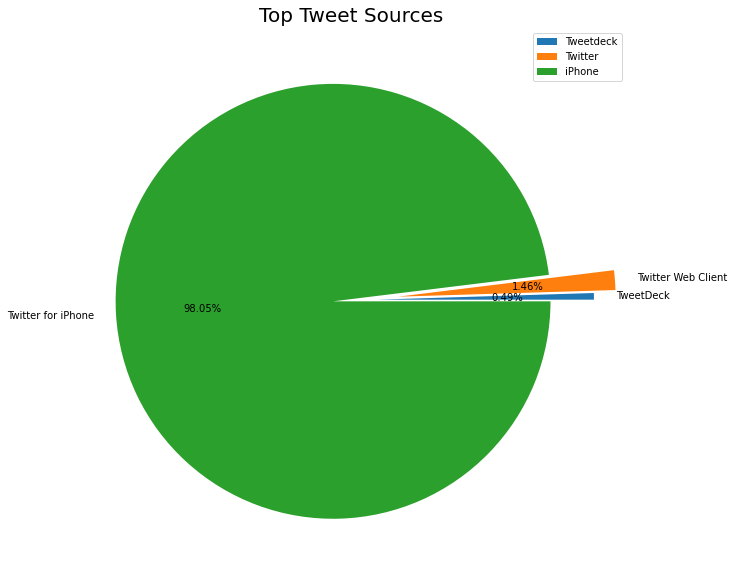

In [238]:
tweet_source = df_merged.groupby('source').count()[['tweet_id']]
tweet_source.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_source['source_percentage'] = tweet_source.source_count / tweet_source.source_count.sum() * 100
tweet_source['source_percentage'].plot.pie(figsize=(10,10), autopct='%1.2f%%', explode=[0.1,0.2,0.1])
plt.title("Top Tweet Sources ", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "iPhone"])
plt.ylabel('');

#### Insight
- Based on the analysis of the cleaned dataset, it was found that:
  The majority of tweets (98.05%) were posted using the Twitter app for iPhone, followed by Twitter Web Client (1.46%) and TweetDeck (0.49%). This is evidenced by the pie chart generated from the source column.

### Dog Stage Ratio

In [239]:
df_stage = df_merged[df_merged['dog_stage'] != 'nan']
df_stage.dog_stage.value_counts()

pupper           209
doggo             65
puppo             23
pupper,doggo      11
floofer            7
puppo,doggo        1
floofer,doggo      1
Name: dog_stage, dtype: int64

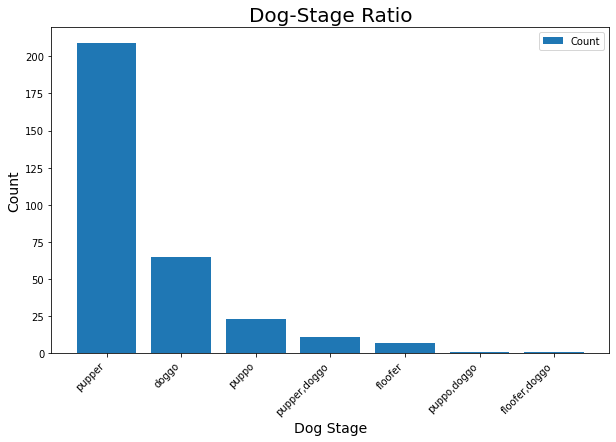

In [240]:
plt.figure(figsize=(10,6))
plt.title('Dog-Stage Ratio', {'fontsize': 20})
plt.bar(x=df_stage['dog_stage'].value_counts().index,
        height=df_stage.dog_stage.value_counts().values, label='Count')
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Dog Stage', fontsize=14)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

### Insights 
- The most common dog stage in the dataset was `pupper` while `floofer,doggo` is the least popular stage 

### Most Used Dog Names

In [241]:
df_merged.name.value_counts()[0:10]

Tucker     10
Penny      10
Charlie    10
Oliver     10
Cooper     10
Lucy        9
Bo          8
Sadie       8
Winston     8
Lola        8
Name: name, dtype: int64

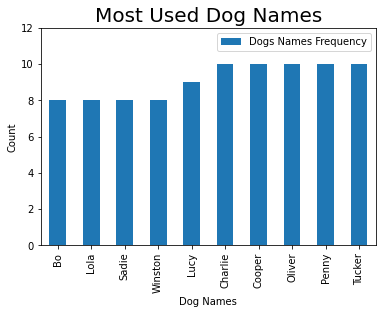

In [242]:
dogs_name = df_merged.query('name == name')
dogs_name_grouped = dogs_name.groupby('name').count()[['tweet_id']]
dogs_name_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dogs_name_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=12)
plt.title("Most Used Dog Names",{'fontsize': 20})
plt.xlabel("Dog Names")
plt.ylabel("Count")
plt.legend(["Dogs Names Frequency"]);

### Insights
The most common dog names used are `Tucker`, `Penny`, `Oliver`, `Cooper` and `Charlie` .